In [168]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
data = pd.read_csv("data.csv")

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [171]:
data = data.drop(['date','country'],axis = 1)

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
dtypes: float64(4), int64(9), object(3)
memory usage: 575.1+ KB


In [173]:
label_encoder = LabelEncoder()

data['street_encoded'] = label_encoder.fit_transform(data['street'])
data['city_encoded'] = label_encoder.fit_transform(data['city'])
data['statezip_encoded'] = label_encoder.fit_transform(data['statezip'])

In [174]:
data = data.drop(['street','city','statezip'],axis= 1)

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             4600 non-null   float64
 1   bedrooms          4600 non-null   float64
 2   bathrooms         4600 non-null   float64
 3   sqft_living       4600 non-null   int64  
 4   sqft_lot          4600 non-null   int64  
 5   floors            4600 non-null   float64
 6   waterfront        4600 non-null   int64  
 7   view              4600 non-null   int64  
 8   condition         4600 non-null   int64  
 9   sqft_above        4600 non-null   int64  
 10  sqft_basement     4600 non-null   int64  
 11  yr_built          4600 non-null   int64  
 12  yr_renovated      4600 non-null   int64  
 13  street_encoded    4600 non-null   int32  
 14  city_encoded      4600 non-null   int32  
 15  statezip_encoded  4600 non-null   int32  
dtypes: float64(4), int32(3), int64(9)
memory u

<Axes: >

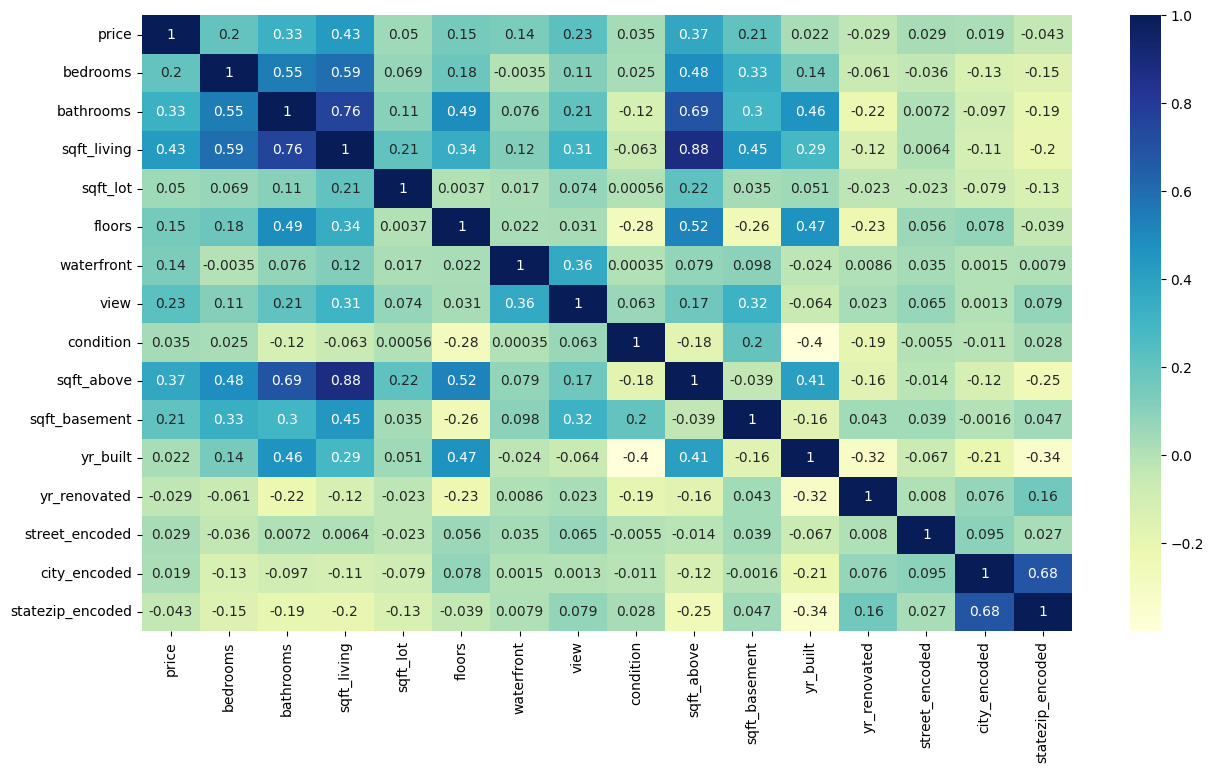

In [176]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(),annot = True,cmap = "YlGnBu")

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'street_encoded'}>,
        <Axes: title={'center': 'city_encoded'}>,
        <Axes: title={'center': 'statezip_encoded'}>]], dtype=object)

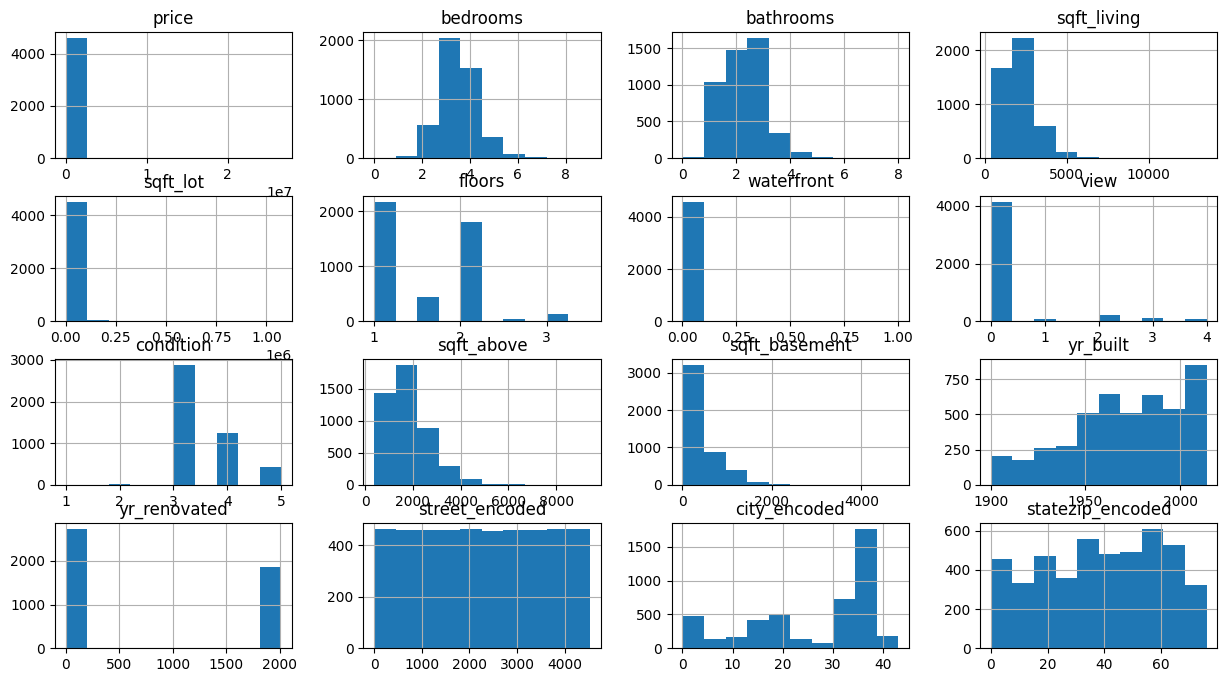

In [177]:
data.hist(figsize = (15,8))

In [178]:
X = data.drop(['price'],axis = 1)
y = data['price']

In [179]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [180]:
train_data = X_train.join(y_train)

In [181]:
train_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street_encoded,city_encoded,statezip_encoded,price
337,4.0,1.75,2060,26036,1.0,0,0,4,1160,900,1947,1988,1380,26,68,647500.0
2194,6.0,1.50,1930,8400,1.0,0,0,3,1030,900,1971,0,3163,6,65,175000.0
1379,3.0,3.00,2520,2152,1.5,0,0,3,1560,960,1925,2006,1554,35,58,780000.0
2081,2.0,1.00,1440,3225,1.0,0,0,3,960,480,1915,0,1148,35,47,445000.0
738,4.0,2.50,2680,9185,2.0,0,0,3,2680,0,1989,0,2280,16,17,620000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,2.0,1.75,1220,15600,1.0,0,0,3,1220,0,1972,2002,2902,1,0,215500.0
3081,3.0,1.75,1840,8086,1.0,0,0,4,1840,0,1964,0,780,31,31,550000.0
3420,3.0,1.50,1490,4400,1.5,0,0,4,1490,0,1906,1990,4417,35,59,670000.0
4237,1.0,1.00,730,1942,1.0,0,0,3,730,0,2008,0,4392,35,64,321500.0


In [182]:
train_data['bathrooms'] = np.log(train_data['bathrooms'] + 1)
train_data['sqft_above'] = np.log(train_data['sqft_above'] + 1)
train_data['sqft_living'] = np.log(train_data['sqft_living'] + 1)
train_data['view'] = np.log(train_data['view'] + 1)
train_data['waterfront'] = np.log(train_data['waterfront'] + 1)
train_data['sqft_lot'] = np.log(train_data['sqft_lot'] + 1)
train_data['sqft_basement'] = np.log(train_data['sqft_basement'] + 1)

In [183]:
train_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street_encoded,city_encoded,statezip_encoded,price
337,4.0,1.011601,7.630947,10.167274,1.0,0.0,0.0,4,7.057037,6.803505,1947,1988,1380,26,68,647500.0
2194,6.0,0.916291,7.565793,9.036106,1.0,0.0,0.0,3,6.938284,6.803505,1971,0,3163,6,65,175000.0
1379,3.0,1.386294,7.832411,7.674617,1.5,0.0,0.0,3,7.353082,6.867974,1925,2006,1554,35,58,780000.0
2081,2.0,0.693147,7.273093,8.078998,1.0,0.0,0.0,3,6.867974,6.175867,1915,0,1148,35,47,445000.0
738,4.0,1.252763,7.893945,9.125436,2.0,0.0,0.0,3,7.893945,0.000000,1989,0,2280,16,17,620000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,2.0,1.011601,7.107425,9.655090,1.0,0.0,0.0,3,7.107425,0.000000,1972,2002,2902,1,0,215500.0
3081,3.0,1.011601,7.518064,8.998013,1.0,0.0,0.0,4,7.518064,0.000000,1964,0,780,31,31,550000.0
3420,3.0,0.916291,7.307202,8.389587,1.5,0.0,0.0,4,7.307202,0.000000,1906,1990,4417,35,59,670000.0
4237,1.0,0.693147,6.594413,7.571988,1.0,0.0,0.0,3,6.594413,0.000000,2008,0,4392,35,64,321500.0


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>],
       [<Axes: title={'center': 'street_encoded'}>,
        <Axes: title={'center': 'city_encoded'}>,
        <Axes: title={'center': 'statezip_encoded'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

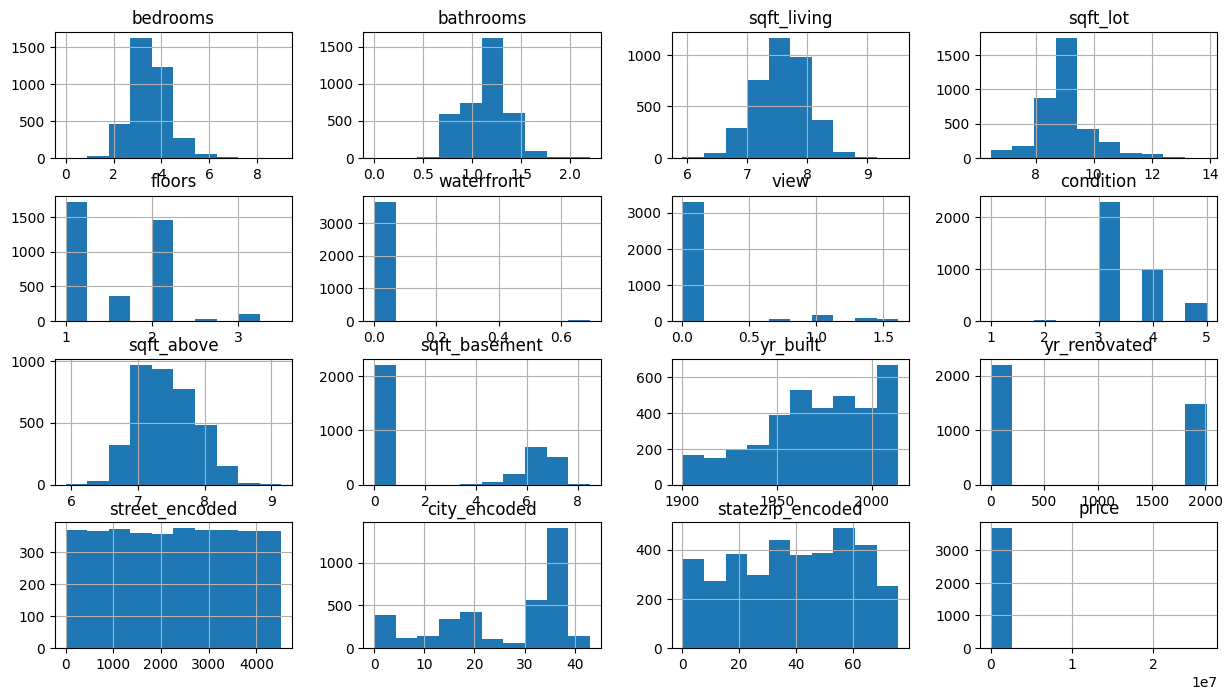

In [184]:
train_data.hist(figsize = (15,8))

In [185]:
from sklearn.linear_model import LinearRegression

X_train , y_train = train_data.drop(['price'],axis = 1),train_data['price']

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [186]:
test_data = (X_test).join(y_test)

test_data['bathrooms'] = np.log(test_data['bathrooms'] + 1)
test_data['sqft_above'] = np.log(test_data['sqft_above'] + 1)
test_data['sqft_living'] = np.log(test_data['sqft_living'] + 1)
test_data['view'] = np.log(test_data['view'] + 1)
test_data['waterfront'] = np.log(test_data['waterfront'] + 1)
test_data['sqft_lot'] = np.log(test_data['sqft_lot'] + 1)
test_data['sqft_basement'] = np.log(test_data['sqft_basement'] + 1)

In [187]:
X_test , y_test = test_data.drop(['price'],axis = 1),test_data['price']

In [188]:
reg.score(X_test,y_test)

0.4947338867959781

In [189]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train,y_train)

RandomForestRegressor()

In [190]:
forest.score(X_test,y_test)

0.5315395947412235

In [191]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid =  {
    "n_estimators" : [ 100 , 200 , 300],
    "min_samples_split" : [2 ,4 ],
    "max_depth" : [None , 4, 8],
    "max_features":[None,'sqrt','log2']
}

grid_search = GridSearchCV(forest , param_grid , cv = 5 , scoring = "neg_mean_squared_error" , return_train_score = True)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [192]:
grid_search.best_estimator_

RandomForestRegressor(max_features='sqrt', min_samples_split=4,
                      n_estimators=300)

In [193]:
grid_search.best_estimator_.score(X_test,y_test)

0.6385105458067853